In [1]:
# pip install xgboost lightgbm
# pip install pandas
# pip install openpyxl
# pip install openpyxl
# pip install seaborn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import seaborn as sns

1. Read Data

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")
# print(df['CreditCard'] = 0)
# df = df[df['CreditCard'] == 0 ]
# df.shape
# df = df[df["CCAvg"] > 0.00]

# df.shape
# df = df[df[]]
# df['CreditCard'].describe()
# print(df["CreditCard"].count())
# print(df["CreditCard"].value_counts())
# df["CreditCard"].min()
# df["CreditCard"].max()
# df["CreditCard"].mean()
# df["CreditCard"].median()
# df["CreditCard"].std()
# df["CreditCard"].mode()[1]
# df["CreditCard"].quantile(0.25)

In [4]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")
# df.head()

target_Y = df["Personal Loan"]
df.drop(columns=["ID", "Personal Loan"], axis=1, inplace=True)
features_X = df.copy()

2. Split the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features_X, target_Y, test_size=0.30, random_state=42, shuffle=True)

📐 Step 3: Feature Scaling (Optional)
Decision Trees do not require feature scaling.

Skip StandardScaler/MinMaxScaler here.

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')
# clf = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42, min_samples_split=20, min_samples_leaf=5)
# Best parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 6, 'criterion': 'gini'}

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

4. Score of our model

In [7]:
probabilities = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data: {probabilities.shape[0]} samples, {accuracy:.2%} accuracy") # type: ignore

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Model accuracy on test data: 1500 samples, 89.80% accuracy
Confusion Matrix:
[[1336    7]
 [ 146   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1343
           1       0.61      0.07      0.13       157

    accuracy                           0.90      1500
   macro avg       0.76      0.53      0.54      1500
weighted avg       0.87      0.90      0.86      1500



In [8]:
# Todo:
#     Correlation matrix
#     Cross Validation Score

5. Plot our model

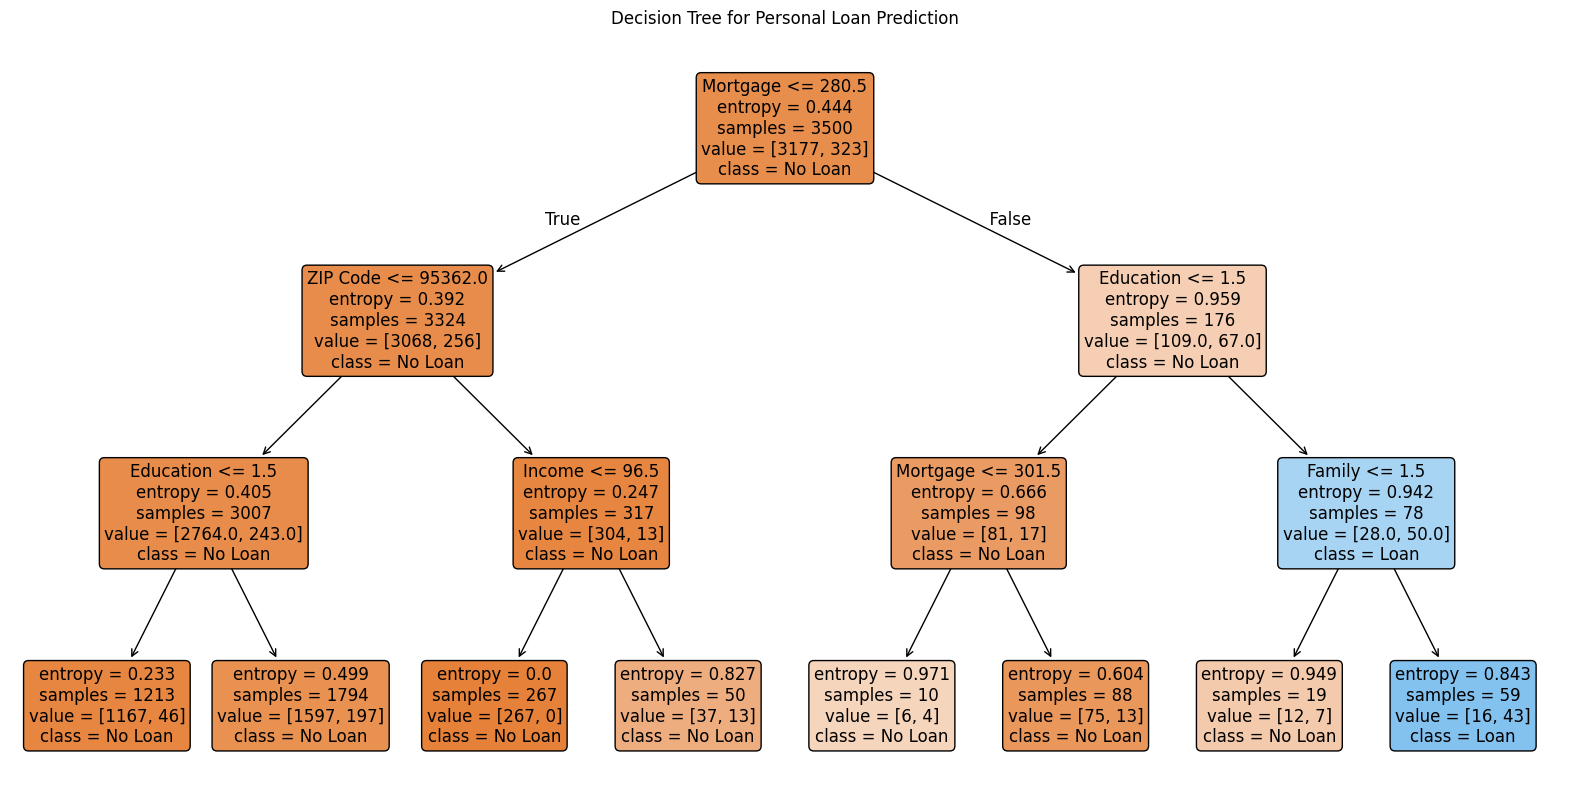

In [9]:
# Plot the tree
plt.figure(figsize=(20, 10))  
plot_tree(clf, 
          feature_names=X_train.columns,
          class_names=['No Loan', 'Loan'],
          filled=True, 
          rounded=True, 
          fontsize=12)

plt.title("Decision Tree for Personal Loan Prediction")
plt.show()

6. Use RandomizedSearchCV to find best parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
Accuracy of the best estimator on test data: 98.40%


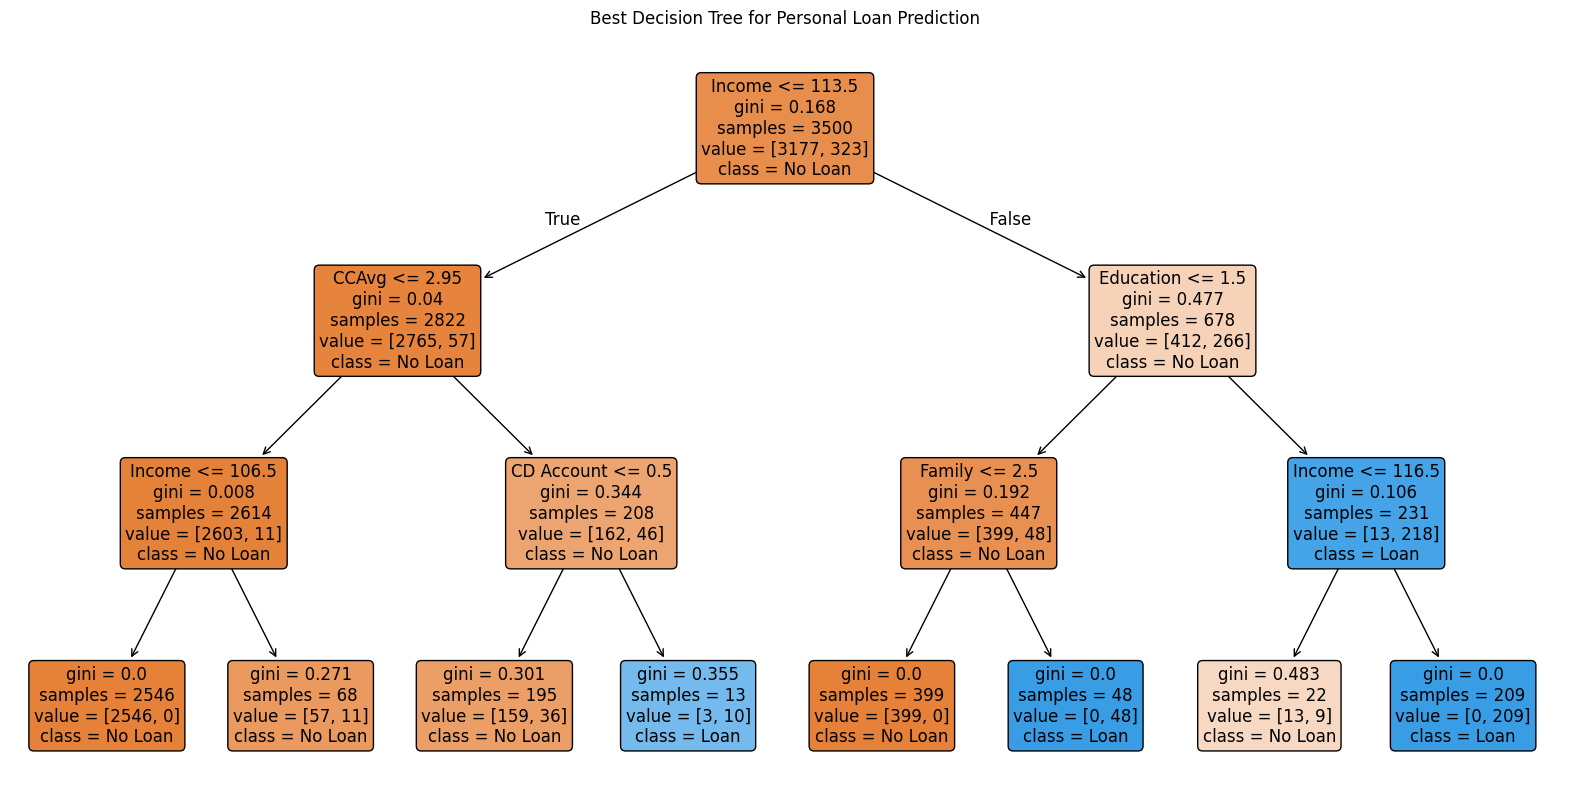

In [10]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}
# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   scoring='accuracy',
                                   cv=5,  # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores   
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

best_estimator = random_search.best_estimator_

#Assess the performance of the best estimator on the test set
y_pred_best = best_estimator.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best estimator on test data: {accuracy_best:.2%}")


# Plot the best decision tree
plt.figure(figsize=(20, 10))  
plot_tree(best_estimator,
            feature_names=X_train.columns,  
            class_names=['No Loan', 'Loan'],
            filled=True, 
            rounded=True, 
            fontsize=12)
plt.title("Best Decision Tree for Personal Loan Prediction")
plt.show()

7. Visualize feature importance

Feature: Age, Importance: 0.0000
Feature: Experience, Importance: 0.0000
Feature: Income, Importance: 0.3417
Feature: ZIP Code, Importance: 0.0000
Feature: Family, Importance: 0.1735
Feature: CCAvg, Importance: 0.0367
Feature: Education, Importance: 0.4313
Feature: Mortgage, Importance: 0.0000
Feature: Securities Account, Importance: 0.0000
Feature: CD Account, Importance: 0.0169
Feature: Online, Importance: 0.0000
Feature: CreditCard, Importance: 0.0000


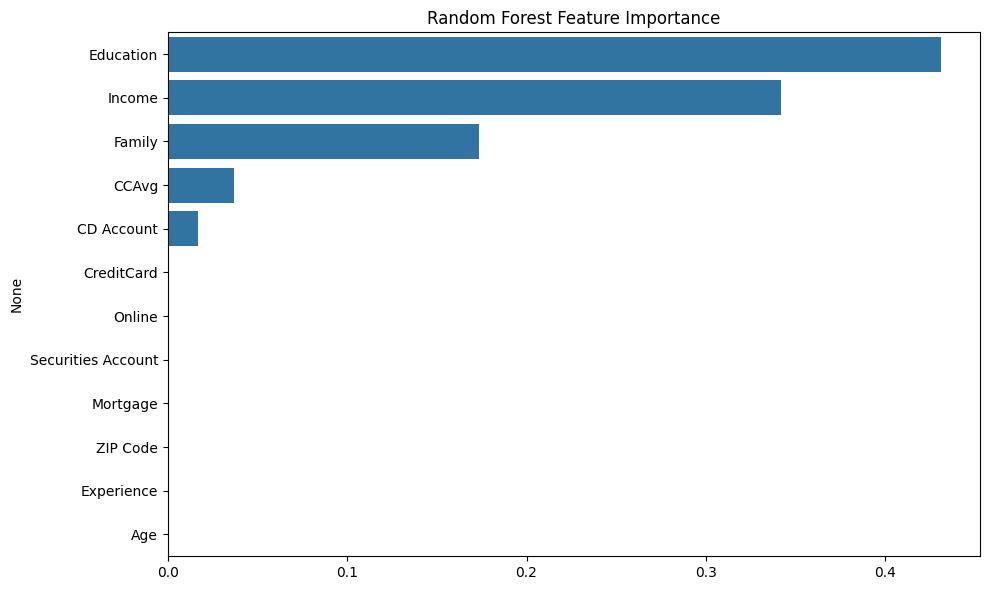

In [11]:
# Get feature importances
importances = best_estimator.feature_importances_ # type: ignore
feature_names = X_train.columns
indices = importances.argsort()[::-1]

for i, feature in enumerate(feature_names):
    print(f"Feature: {feature}, Importance: {importances[i]:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

8. Use RamdomSearchClassifier

🔍 Random Forest
Accuracy: 0.99
[[1342    1]
 [  14  143]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.91      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



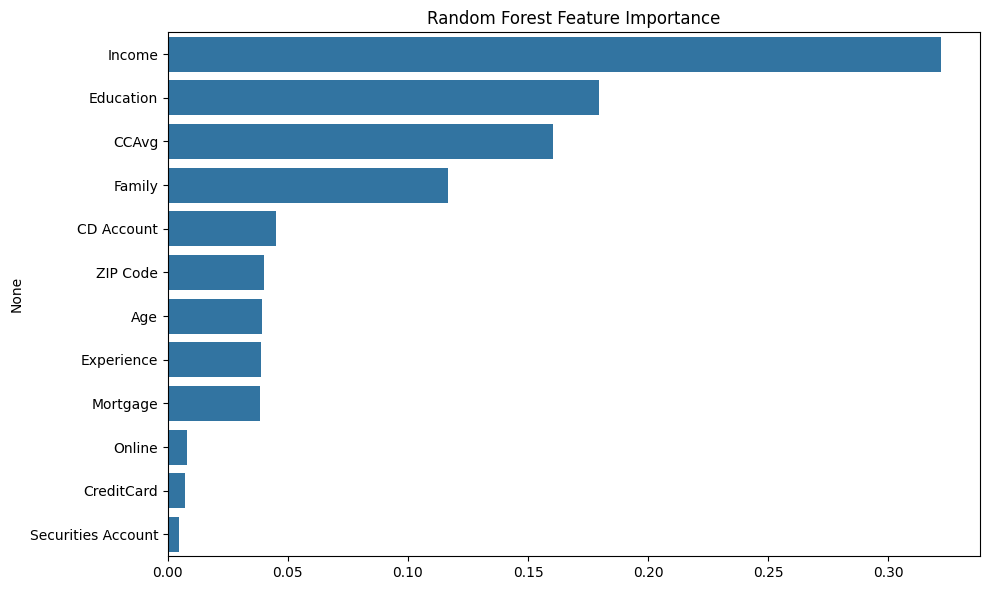

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("🔍 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# For Random Forest
importances = rf.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
